In [1]:
import numpy as np
import pandas as pd
dataset=pd.read_csv('../input/anual-salary-reports-survey/salary_data.csv',sep=';')
display(dataset.head())
display(dataset.shape)

,ID,income,age,gender,education_level
0,12182,86519.608537,45,M,2.0
1,81213,83085.864980,30,M,2.0
2,1996,82606.214973,22,M,2.0
3,9366,81551.229988,36,M,2.0
4,9733,79593.253224,51,M,1.0


(100000, 5)

In [2]:
dataset=pd.DataFrame(dataset)

from sklearn.preprocessing import OneHotEncoder 
encoder= OneHotEncoder(handle_unknown='ignore')

encoder_df=pd.DataFrame(encoder.fit_transform(dataset[['gender']]).toarray())
encoder_df.columns=['Female','Male']

final_df=dataset.join(encoder_df)
final_df.drop('gender',axis=1,inplace=True)
final_df.drop('ID',axis=1,inplace=True)

display(final_df.head(100))

,income,age,education_level,Female,Male
0,86519.608537,45,2.0,0.0,1.0
1,83085.864980,30,2.0,0.0,1.0
2,82606.214973,22,2.0,0.0,1.0
3,81551.229988,36,2.0,0.0,1.0
4,79593.253224,51,1.0,0.0,1.0
...,...,...,...,...,...
95,71141.779060,21,2.0,1.0,0.0
96,71087.976838,55,2.0,0.0,1.0
97,71076.207928,19,1.0,0.0,1.0
98,71039.622904,34,1.0,0.0,1.0


In [3]:
def Normalize(data):
    return (data-np.min(data))/(np.max(data)-np.min(data))

In [4]:
final_df=Normalize(final_df)

display(final_df.head())
display(final_df.shape)

,income,age,education_level,Female,Male
0,0.264552,0.529412,0.666667,0.0,1.0
1,0.251850,0.235294,0.666667,0.0,1.0
2,0.250076,0.078431,0.666667,0.0,1.0
3,0.246174,0.352941,0.666667,0.0,1.0
4,0.238931,0.647059,0.333333,0.0,1.0


(100000, 5)

In [5]:
df_train=final_df.sample(frac=0.7,random_state=0)
df_valid=final_df.drop(df_train.index)
x_train=df_train.drop('income',axis=1)
x_valid=df_valid.drop('income',axis=1)
y_train=df_train['income']
y_valid=df_valid['income']
input_shape=[4]

In [6]:
from tensorflow import keras 
from tensorflow.keras import layers 

model=keras.Sequential(
    [
        layers.Dense(3,activation='relu',input_shape=input_shape),
        layers.Dense(3,activation='relu'),
        layers.Dense(1)
    ]
)

2022-10-06 17:39:20.181978: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [8]:
history=model.fit(
    x_train,y_train,validation_data=(x_valid,y_valid),batch_size=100,epochs=20
)

2022-10-06 17:39:20.392614: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
700/700 [==============================] - 2s 3ms/step - loss: 0.0328 - val_loss: 0.0307
Epoch 2/20
700/700 [==============================] - 1s 2ms/step - loss: 0.0306 - val_loss: 0.0306
Epoch 3/20
700/700 [==============================] - 2s 2ms/step - loss: 0.0306 - val_loss: 0.0307
Epoch 4/20
700/700 [==============================] - 2s 2ms/step - loss: 0.0306 - val_loss: 0.0306
Epoch 5/20
700/700 [==============================] - 2s 2ms/step - loss: 0.0306 - val_loss: 0.0307
Epoch 6/20
700/700 [==============================] - 2s 2ms/step - loss: 0.0306 - val_loss: 0.0306
Epoch 7/20
700/700 [==============================] - 2s 2ms/step - loss: 0.0306 - val_loss: 0.0306
Epoch 8/20
700/700 [==============================] - 2s 2ms/step - loss: 0.0306 - val_loss: 0.0306
Epoch 9/20
700/700 [==============================] - 2s 2ms/step - loss: 0.0306 - val_loss: 0.0306
Epoch 10/20
700/700 [==============================] - 2s 2ms/step - loss: 0.0306 - val_loss: 0.0306

Min validation loss 0.03057713247835636


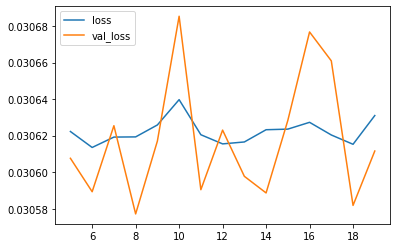

In [9]:
history_df=pd.DataFrame(history.history)
history_df.loc[5:,['loss','val_loss']].plot()
print("Min validation loss {}".format(history_df['val_loss'].min()))